<a href="https://colab.research.google.com/github/Rifaul31/Preprocessing-Case-Study/blob/main/Group_4_Data_Pre_Processing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group 4
- Nur Ahsar Setyiowen (1301180506)
- Meizan Arthur Alfianto (1301194178)
- Aulia Rahman Arif Wahyudi (1301194195)
- Rizqi Khoir Y (1301194266)

Dataset used : https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees#

Dataset Attributes:


```
01 date : Date in MM-DD-YYYY
02 day : Day of the Week
03 quarter : A portion of the month. A month was divided into four quarters
04 department : Associated department with the instance
05 team_no : Associated team number with the instance
06 no_of_workers : Number of workers in each team
07 no_of_style_change : Number of changes in the style of a particular product
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
09 smv : Standard Minute Value, it is the allocated time for a task
10 wip : Work in progress. Includes the number of unfinished items for products
11 over_time : Represents the amount of overtime by each team in minutes
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13 idle_time : The amount of time when the production was interrupted due to several reasons
14 idle_men : The number of workers who were idle due to production interruption
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.
```



# Step 1 : Data Overview

Initialization

In [ ]:
# Initialization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('https://bit.ly/garmentDataset', header = 0, index_col='date', parse_dates=True)
data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
date,,,,,,,,,,,,,,
2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1197 entries, 2015-01-01 to 2015-03-11
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    691 non-null    float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
mem

Computing the number of Objects and Attributes

In [ ]:
# Computing the number of object and attributes
print (data.shape)
print ("There are %d number of object instances and %d number of attributes" %(data.shape[0], data.shape[1]))

(1197, 14)
There are 1197 number of object instances and 14 number of attributes


Frequency of an Attribute Value (In Percentage)

In [ ]:
# Frequency of an attribute value (In Percentage)
col = data.columns
for i in col:
  print("\n---------------------------------------")
  print("\nPercentage of %s" %(i))
  print(data[i].value_counts(normalize=True) * 100)


---------------------------------------

Percentage of quarter
Quarter1    30.075188
Quarter2    27.986633
Quarter4    20.718463
Quarter3    17.543860
Quarter5     3.675856
Name: quarter, dtype: float64

---------------------------------------

Percentage of department
sweing        57.727652
finishing     21.470343
finishing     20.802005
Name: department, dtype: float64

---------------------------------------

Percentage of day
Wednesday    17.376775
Sunday       16.959064
Tuesday      16.791980
Monday       16.624896
Thursday     16.624896
Saturday     15.622389
Name: day, dtype: float64

---------------------------------------

Percentage of team
8     9.106099
2     9.106099
4     8.771930
1     8.771930
9     8.688388
10    8.354219
12    8.270677
7     8.020050
3     7.936508
6     7.852966
5     7.769424
11    7.351713
Name: team, dtype: float64

---------------------------------------

Percentage of targeted_productivity
0.80    45.112782
0.70    20.217210
0.75    18.045113


Statistical Description

In [ ]:
# Statistical Description
data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Summary Data Plots

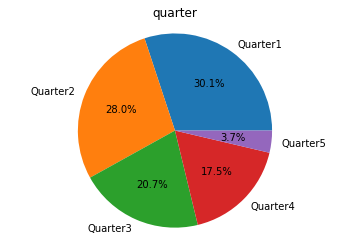

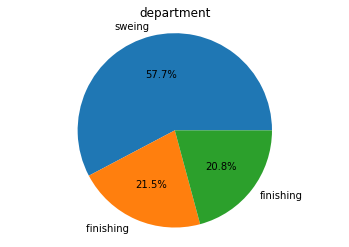

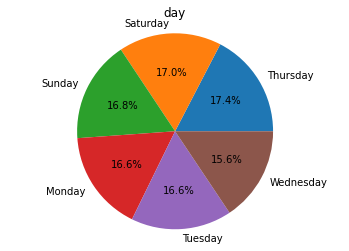

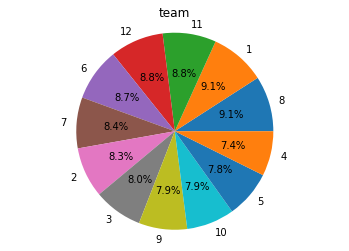

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f937958e590>,
      dtype=object)

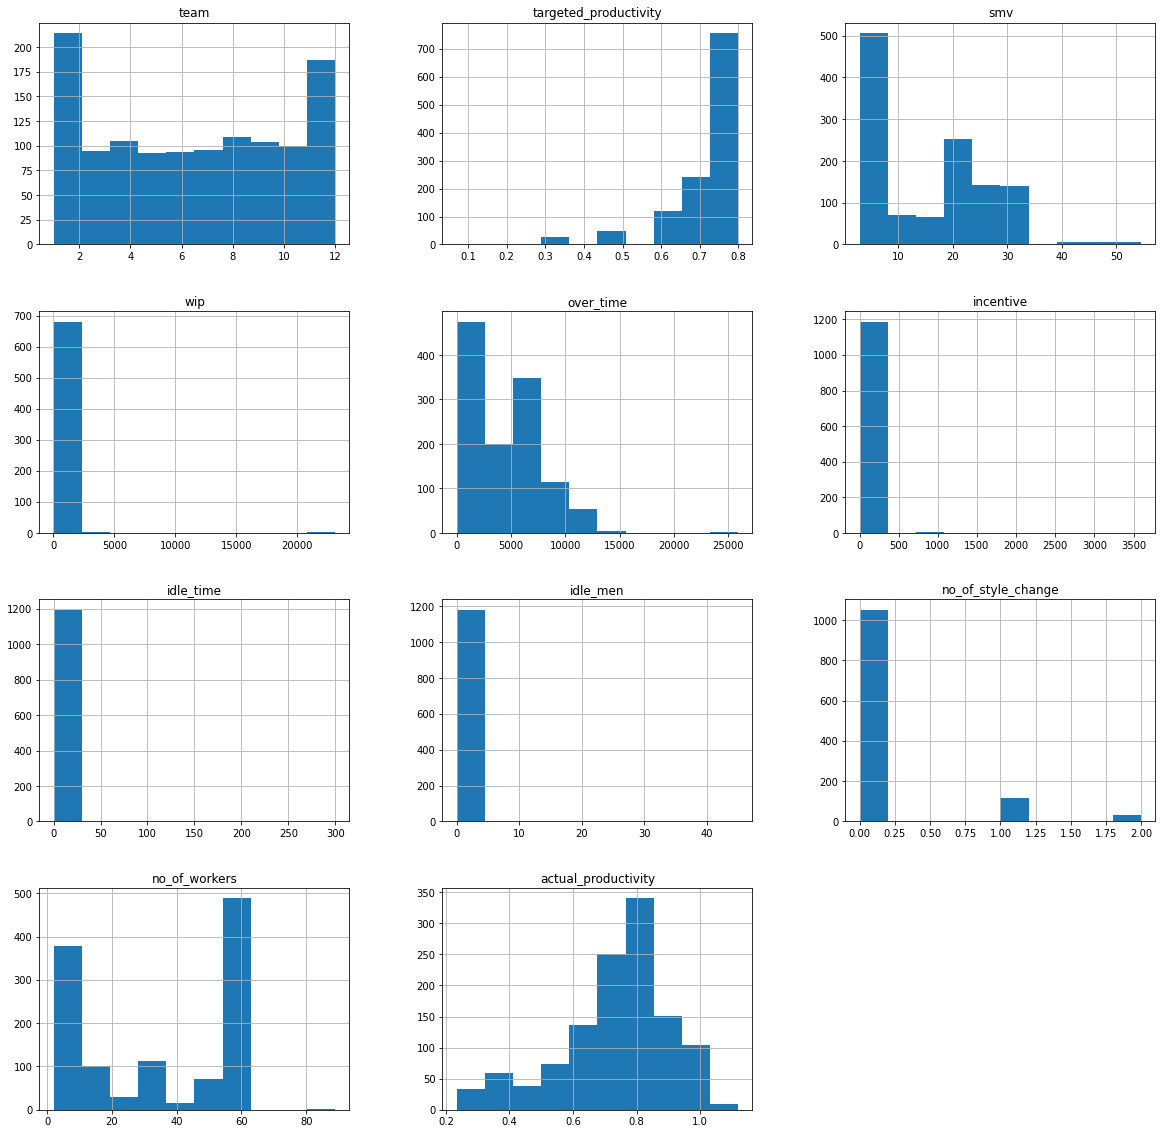

In [ ]:
# Data Plots
for i in col[:4]:
  my_labels = tuple(data[i].unique())
  plt.pie(data[i].value_counts(),labels=my_labels,autopct='%1.1f%%')
  plt.title(i)
  plt.axis('equal')
  plt.show()
  print("\n")

display(data[col].hist(figsize=(20, 20)))

Correlation Data Plot

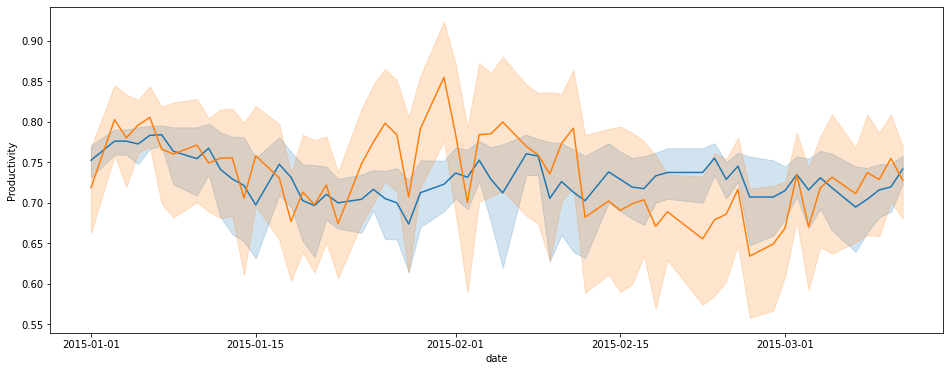

In [ ]:
plt.figure(figsize = (16,6))
ax=sns.lineplot(y='targeted_productivity',x='date', data=data, legend='auto')
ax=sns.lineplot(y= 'actual_productivity',x='date', data=data, legend='auto')
ax.set(ylabel = 'Productivity')
plt.show()

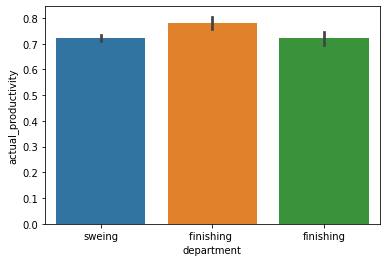

In [ ]:
sns.barplot(y='actual_productivity',x = data['department'], data = data)

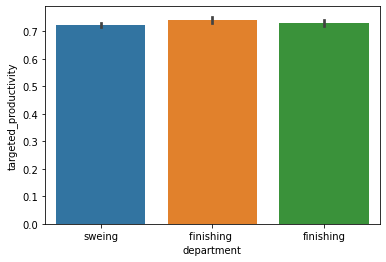

In [ ]:
sns.barplot(y='targeted_productivity',x = data['department'], data = data)

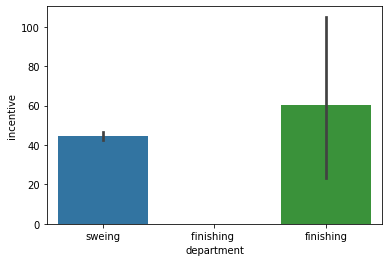

In [ ]:
sns.barplot(x=data['department'], y="incentive", data = data)

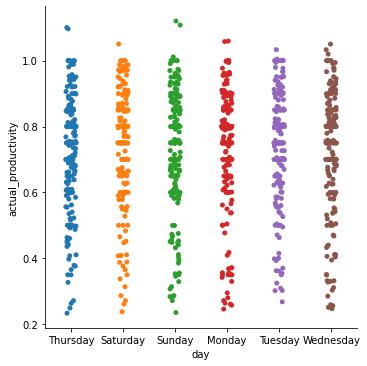

In [ ]:
sns.catplot(x='day', y='actual_productivity', data = data)

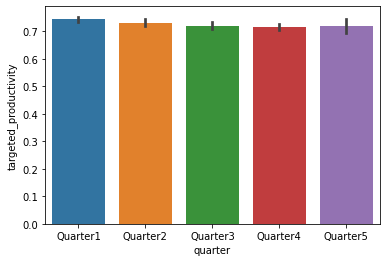

In [ ]:
sns.barplot(x='quarter',y='targeted_productivity',data = data,)


Data Quality Issues:
```
1. The number of object in 'wip' is less than the others attributes. This suggest that there are missing data
2. The values in column 'department' contain inconsistencies and typo
3. There are values in column 'actual_productivity' that are out of range
4. The 'over_time' values are in minutes. Changing to Hourly will give more better perspective
5. The data are from the year 2015, and from January to March. Logged Daily. Changing to monthly will give more better perspective
```



# Step 2 : Pre Processing Approach

The Preprocessing approach that we use are:
- Data Cleaning
- Feature Aggregation (Cleaning inconsistent data)
- Attribute Transformation (to rescale values in some attributes)

Expected Outcomes:
- Missing Values in 'wip' is filled with 0. Considering the empty values in 'wip' column means that there are no longer product that are 'work in progress'
- 'sweing' is changed to 'sewing'
- Inconsistencies of the word 'finishing' are corrected
- Aggregating from daily to monthly
- The values in 'actual_productivity' are within range of 0-1
- The values in 'over_time' are changed from minutes to hours

# Step 3 : Pre Processing Implementation

In [ ]:
# Copying data to be preprocessed
new_data = data

Missing Values

In [ ]:
# Checking the missing values in the data
new_data.isna().sum()

quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [ ]:
# Filling the missing values with the value 0
new_data['wip'] = new_data['wip'].fillna(0)
new_data.isna().sum()

quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

Data Aggregation

In [ ]:
print(new_data['department'].unique())

# Correcting typos
new_data = new_data.replace(['sweing'], ['sewing'])
print(new_data['department'].unique())

# Aggregating inconsistent data
new_data = new_data.replace(['finishing '], ['finishing'])
print(new_data['department'].unique())

['sweing' 'finishing ' 'finishing']
['sewing' 'finishing ' 'finishing']
['sewing' 'finishing']


In [ ]:
new_data = new_data.reset_index()
new_data['date'] = pd.to_datetime(new_data['date'])
new_data['date'] = new_data['date'].dt.month_name()
new_data.rename(columns={"date":"month"}, inplace=True)
new_data = new_data.set_index('month')
new_data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
month,,,,,,,,,,,,,,
January,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
January,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
January,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
January,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
January,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Attribute Transformation

In [ ]:
minval = min(new_data["actual_productivity"].values)
maxval = max(new_data["actual_productivity"].values)
print("Minimal Value = %f" %(minval))
print("Maximal Value = %f" %(maxval))
print(new_data['actual_productivity'].describe())

#Rescale the values
#Since both 'actual_productivity' is rescaled then 'targeted_productivity' is also rescaled for consistencies
new_data["actual_productivity"] = new_data["actual_productivity"].apply(lambda x: (x - minval) / (maxval - minval))
new_data["targeted_productivity"] = new_data["targeted_productivity"].apply(lambda x: (x - minval) / (maxval - minval))
minval = min(new_data["actual_productivity"].values)
maxval = max(new_data["actual_productivity"].values)
print("\nMinimal Value = %f" %(minval))
print("Maximal Value = %f" %(maxval))

print(new_data['actual_productivity'].describe())

Minimal Value = 0.233705
Maximal Value = 1.120437
count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

Minimal Value = 0.000000
Maximal Value = 1.000000
count    1197.000000
mean        0.565431
std         0.196776
min         0.000000
25%         0.469817
50%         0.608558
75%         0.695303
max         1.000000
Name: actual_productivity, dtype: float64


In [ ]:
# Converting the values in 'over_time' from minutes to hours
new_data['over_time'] = new_data['over_time'].apply(lambda x: x/60)
new_data['over_time'].describe()

count    1197.000000
mean       76.124339
std        55.813726
min         0.000000
25%        24.000000
50%        66.000000
75%       116.000000
max       432.000000
Name: over_time, dtype: float64

# Step 4 : Evidence and Evaluation

In [ ]:
new_data.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
month,,,,,,,,,,,,,,
January,Quarter1,sewing,Thursday,8,0.638631,26.16,1108.0,118.0,98,0.0,0,0,59.0,0.797332
January,Quarter1,finishing,Thursday,1,0.582244,3.94,0.0,16.0,0,0.0,0,0,8.0,0.736180
January,Quarter1,sewing,Thursday,11,0.638631,11.41,968.0,61.0,50,0.0,0,0,30.5,0.639274
January,Quarter1,sewing,Thursday,12,0.638631,11.41,968.0,61.0,50,0.0,0,0,30.5,0.639274
January,Quarter1,sewing,Thursday,6,0.638631,25.90,1170.0,32.0,50,0.0,0,0,56.0,0.639062


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1197 entries, January to March
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(7), int64(4), object(3)
memory usage: 140.3

In [ ]:
print (new_data.shape)
print ("There are %d number of object instances and %d number of attributes" %(new_data.shape[0], new_data.shape[1]))

(1197, 14)
There are 1197 number of object instances and 14 number of attributes


In [ ]:
new_data.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.559275,15.062172,687.228070,76.124339,38.210526,0.730159,0.369256,0.150376,34.609858,0.565431
std,3.463963,0.110395,10.943219,1514.582341,55.813726,160.182643,12.709757,3.268987,0.427848,22.197687,0.196776
min,1.000000,-0.184617,2.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,3.000000,0.525857,3.940000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.469817
50%,6.000000,0.582244,15.260000,586.000000,66.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.608558
75%,9.000000,0.638631,24.260000,1083.000000,116.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.695303
max,12.000000,0.638631,54.560000,23122.000000,432.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.000000


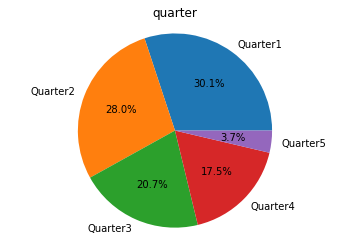

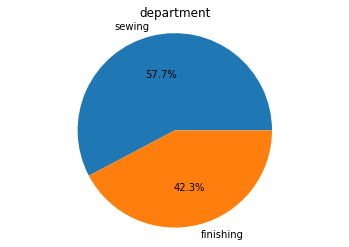

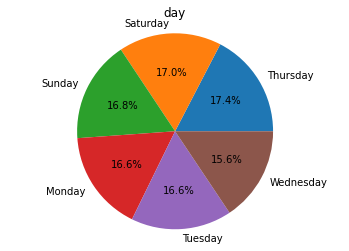

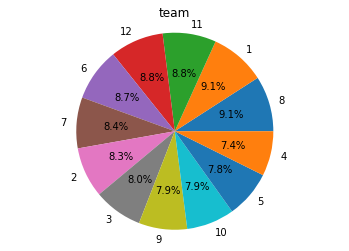

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f93706f1d90>,
      dtype=object)

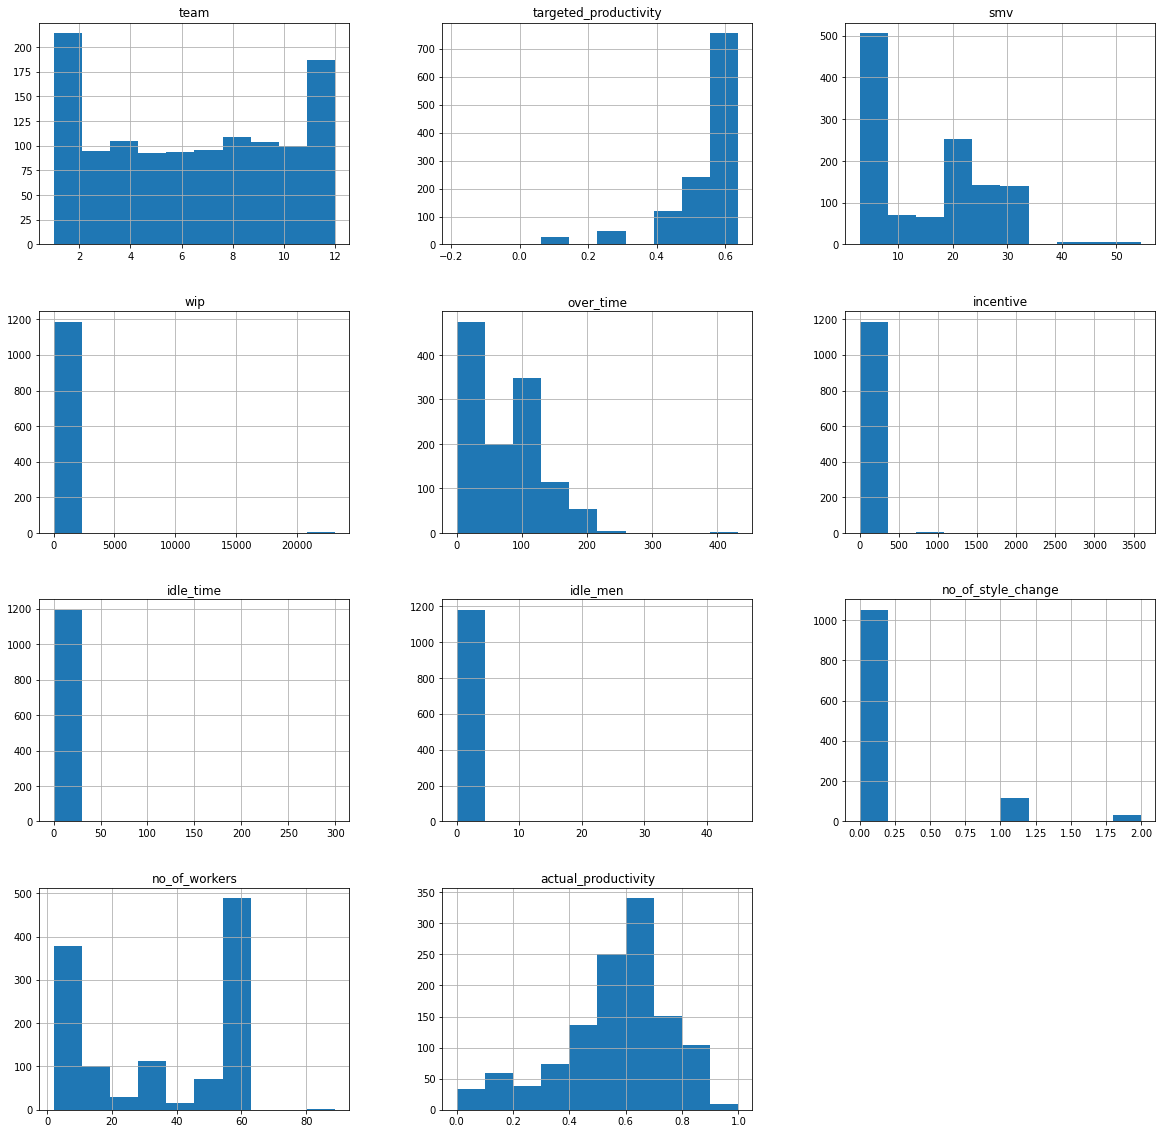

In [ ]:
col = new_data.columns
# Data Plots
for i in col[:4]:
  my_labels = tuple(new_data[i].unique())
  plt.pie(new_data[i].value_counts(),labels=my_labels,autopct='%1.1f%%')
  plt.title(i)
  plt.axis('equal')
  plt.show()
  print("\n")

display(new_data[col].hist(figsize=(20, 20)))

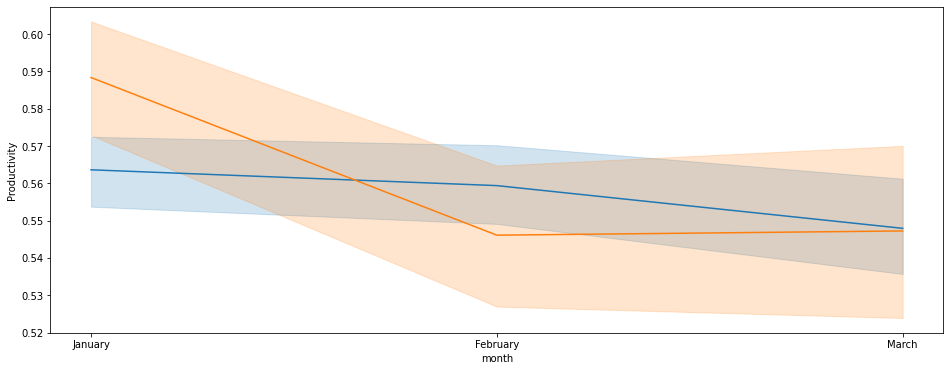

blue = 'targeted_productivity'
orange = 'actual_productivity'


In [ ]:
plt.figure(figsize = (16,6))
ax=sns.lineplot(y='targeted_productivity',x='month', data=new_data, legend='full')
ax=sns.lineplot(y= 'actual_productivity', x='month', data=new_data, legend='full')
ax.set(ylabel = 'Productivity')
plt.show()
print("blue = 'targeted_productivity'")
print("orange = 'actual_productivity'")

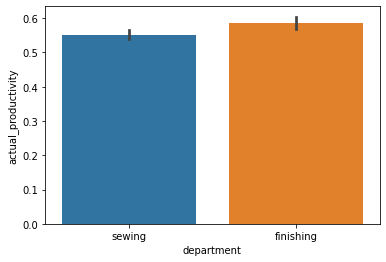

In [ ]:
sns.barplot(y='actual_productivity',x = new_data['department'], data = new_data)

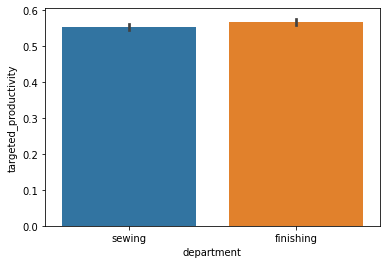

In [ ]:
sns.barplot(y='targeted_productivity',x = new_data['department'], data = new_data)

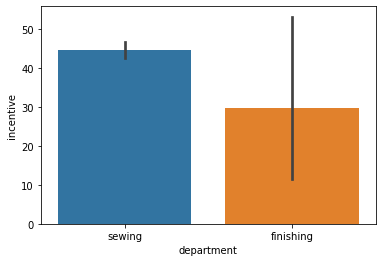

In [ ]:
sns.barplot(x=new_data['department'], y="incentive", data = new_data)

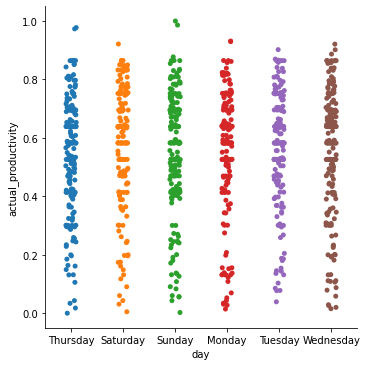

In [ ]:
sns.catplot(x='day', y='actual_productivity', data = new_data)

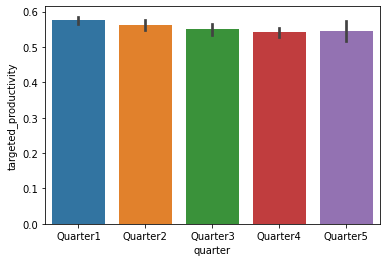

In [ ]:
sns.barplot(x='quarter', y='targeted_productivity', data = new_data)